<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Copy__new_exp_(W)_of_signal_kalman_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install pykalman
!pip install yfinance
!pip install pandas-ta==0.2.45b

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
#Importing dependencies#
from pykalman import KalmanFilter
import numpy as np
import pylab as pl
import pandas as pd
import yfinance as yf
from scipy import poly1d
from datetime import datetime
import pandas_ta as ta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='darkgrid')

In [47]:
pd.options.mode.chained_assignment = None

In [48]:
#ticker = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_niftybanklist.csv')

In [49]:
ticker = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_nifty50list.csv')
START = "2013-01-01"

In [50]:
nifty=yf.download('^nsei',start=START)

[*********************100%***********************]  1 of 1 completed


In [51]:
lst=[]
for i in range(len(ticker)):
  
  dfi = yf.download(str(ticker.Symbol.iloc[i])+'.ns', start=START)
  df = dfi[['Adj Close']]
  f = KalmanFilter(transition_matrices = [1],
                    observation_matrices = [1],
                    initial_state_mean = 0,
                    initial_state_covariance = 1,
                    observation_covariance = 1,
                    transition_covariance = 0.0001)
  mean, cov = f.filter(df['Adj Close'].values)
  mean, std = mean.squeeze(), np.std(cov.squeeze())
  var = 'kalman'
  df[var]=df['Adj Close'].values - mean
  
  lst.append(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [52]:
nlst=[]
for i in range(len(ticker)):
  nlst.append(lst[i].kalman)  

In [53]:
df_kalman = pd.DataFrame(nlst).T

In [54]:
namelist =[]
for i in range(1,len(ticker)+1):
  namelist.append('kalman_'+str(i))
  
df_kalman.columns = namelist

In [55]:
def macd_calc(df):
  columns=df.columns.tolist()
  for var in columns:
    macd='macd'+var
    macd_s='macd'+'signal'+var
    macd_h='hist'+ var
    df[macd]=df[var].ewm(span=26, adjust=False).mean()-df[var].ewm(span=50, adjust=False).mean()
    df[macd_s]=df[macd].ewm(span=18,adjust=False).mean()
    df[macd_h]=df[macd]-df[macd_s]
  return df

In [56]:
final_kalman=macd_calc(df_kalman)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragme

In [57]:
final_kalman.tail(2)

,kalman_1,kalman_2,kalman_3,kalman_4,kalman_5,kalman_6,kalman_7,kalman_8,kalman_9,kalman_10,...,histkalman_47,macdkalman_48,macdsignalkalman_48,histkalman_48,macdkalman_49,macdsignalkalman_49,histkalman_49,macdkalman_50,macdsignalkalman_50,histkalman_50
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-08,70.469302,448.689916,38.455627,420.373623,917.916331,1421.781116,-27.475262,25.443997,131.689161,83.96936,...,41.578197,4.157696,-7.964772,12.122468,220.563452,109.477733,111.085719,-0.323569,-7.360731,7.037162
2022-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.201545,4.157696,-6.688723,10.846419,220.563452,121.170966,99.392485,-0.323569,-6.619977,6.296408


In [58]:
features = final_kalman.columns.tolist()

In [59]:
feats_set1=[feats for feats in features if feats.startswith('hist')]

In [60]:
final_dataframe=final_kalman[feats_set1]

In [61]:
solution=np.sign(final_dataframe)

In [62]:
solution['final']=solution.sum(axis=1)

In [63]:
solution.tail(2)

,histkalman_1,histkalman_2,histkalman_3,histkalman_4,histkalman_5,histkalman_6,histkalman_7,histkalman_8,histkalman_9,histkalman_10,...,histkalman_42,histkalman_43,histkalman_44,histkalman_45,histkalman_46,histkalman_47,histkalman_48,histkalman_49,histkalman_50,final
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,42.0
2022-08-10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,42.0


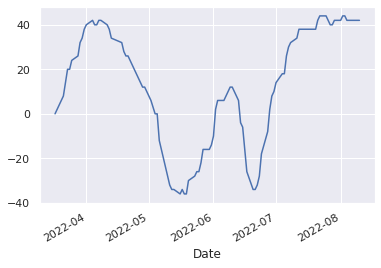

In [64]:
solution.final[-100:].plot();

In [65]:
solution['avg_mov_1']=solution['final'].rolling(window=10).mean()

nifty['avg_mov']=nifty['Adj Close'].rolling(window=22).mean()

In [66]:
l=1300

In [67]:
nifty['spread']=nifty['Close']-nifty['avg_mov']

In [68]:
nifty.head(2)

,Open,High,Low,Close,Adj Close,Volume,avg_mov,spread
Date,,,,,,,,
2013-01-02,5982.600098,6006.049805,5982.000000,5993.25,5993.25,0,NaN,NaN
2013-01-03,6015.799805,6017.000000,5986.549805,6009.50,6009.50,0,NaN,NaN


In [69]:
nifty=nifty[-l:]
solution=solution[-l:]

In [70]:
nifty.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'avg_mov',
       'spread'],
      dtype='object')

In [71]:
df=pd.concat([nifty ,solution[['final','avg_mov_1']]],axis=1)


In [72]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'avg_mov',
       'spread', 'final', 'avg_mov_1'],
      dtype='object')

In [73]:
df['Up Trend'] = np.where((df['Close']>df['avg_mov']) & (df['final']>df['avg_mov_1']),1,0)

In [74]:
df['Down Trend'] = np.where((df['Close']<df['avg_mov']) & (df['final']<df['avg_mov_1']),-1,0)

In [75]:
df['signal_final']=df['Up Trend']+df['Down Trend']

In [81]:
df.signal_final.value_counts()

 1    499
 0    479
-1    327
Name: signal_final, dtype: int64

In [77]:
def regime_switch(betas):
    '''returns list of starting points of each regime'''
    n = len(betas)
    init_points = [0]
    curr_reg = betas[0]
    for i in range(n):
        if (betas[i]) == (not curr_reg):
            curr_reg = not curr_reg
            init_points.append(i)
    init_points.append(n)
    return init_points

In [124]:
#df.reset_index(inplace=True)

def plot_regime_color(dataset, regime_num=3, TR_num=12, lambda_value=16, log_TR = True):
    '''Plot of return series versus regime'''
    #returns = dataset[:,regime_num]
    TR = dataset.iloc[:,3]
    print('TR')
    betas = dataset['signal_final'].tolist()
    print('betas')
    regimelist = regime_switch(dataset['signal_final'])
    print('regimelist')
    curr_reg = betas[0]
    print('***** :',np.sign(betas))
    y_max = np.max(TR) + 500
    print('***** :',betas)
    print('current regime : ',curr_reg)
    if log_TR:
        fig, ax = plt.subplots()
        for i in range(len(regimelist)-1):
            if curr_reg == 0:
                ax.axhspan(0, y_max+500, xmin=regimelist[i]/regimelist[-1], xmax=regimelist[i+1]/regimelist[-1], 
                       facecolor='red', alpha=0.3)
            else:
                ax.axhspan(0, y_max+500, xmin=regimelist[i]/regimelist[-1], xmax=regimelist[i+1]/regimelist[-1], 
                       facecolor='green', alpha=0.5)
            curr_reg = betas[i]
            print('curr regime : ',curr_reg)
        fig.set_size_inches(12,9)   
        plt.plot(TR, label='Total Return')
        plt.ylabel('SP500 Log-scale')
        plt.xlabel('Year')
        plt.yscale('log')
        plt.xlim([dataset.index[0], dataset.index[-1]])
        plt.ylim([1200, 20000])
        plt.yticks([2000, 3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000],[2000, 3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000])
        plt.title('Regime Plot of SP 500', fontsize=24)
        plt.show()

In [ ]:
plot_regime_color(df,lambda_value=10)


In [128]:
df.columns

Index(['level_0', 'index', 'date', 'open', 'high', 'low', 'close', 'adj_close',
       'volume', 'avg_mov', 'spread', 'final', 'avg_mov_1', 'Up Trend',
       'Down Trend', 'signal_final', 'Regime'],
      dtype='object')

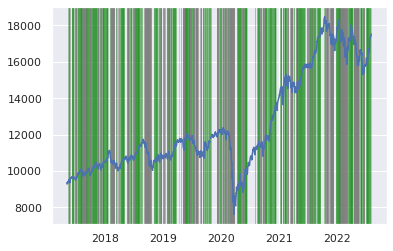

In [145]:
import datetime
df["Regime"] = df['signal_final']


#plot command, save object in variable
plt.plot(df["date"], (df.close.values))
#plt.plot(df.close)
#filter out recession dates
recessions = df.loc[df["Regime"] == -1, 'date']
nonrecession = df.loc[df['Regime']==1,'date']
#plot axvspan for every recession day
for day in recessions:
    
    plt.axvspan(day, day + datetime.timedelta(days=1), color="grey", alpha=0.5)
for day in nonrecession:
    plt.axvspan(day, day + datetime.timedelta(days=1), color="green", alpha=0.2)  
plt.show()

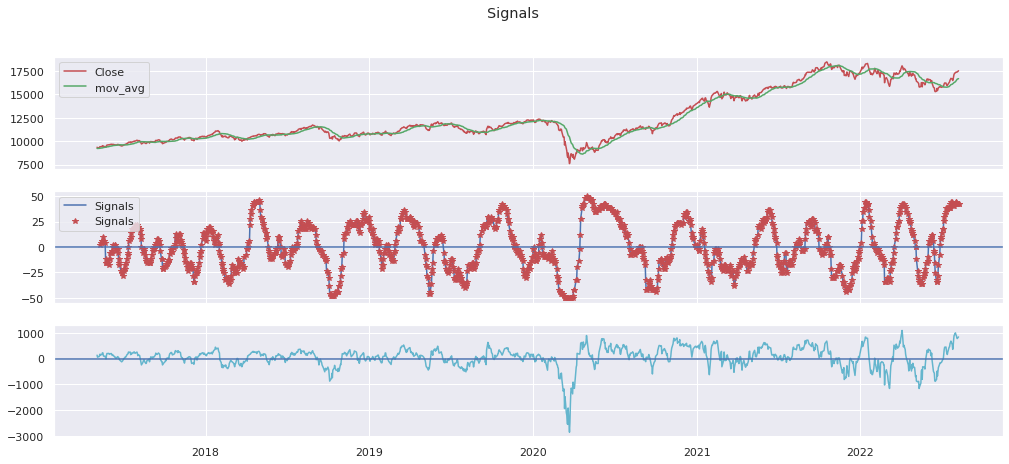

In [101]:
fig, ax = plt.subplots(3,1,figsize=(17,7),sharex=True)
ax[0].plot(nifty.loc[:, :].index, nifty.loc[:, 'Close'],'r', label='Close')
ax[0].plot(nifty.loc[:, :].index, nifty.loc[:, 'avg_mov'],'g', label='mov_avg')
ax[1].plot(solution.loc[:, :].index, solution.loc[:, 'final'],'b', label='Signals')
ax[1].plot(solution.loc[:, :].index, solution.loc[:, 'final'],'r*', label='Signals')
ax[2].plot(nifty.loc[:, :].index,nifty.loc[:,'spread'],'c',label='Spread')
#ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('Signals')
ax[0].legend()
ax[1].legend()
ax[1].axhline(y=0)
ax[2].axhline(y=0)
plt.show()

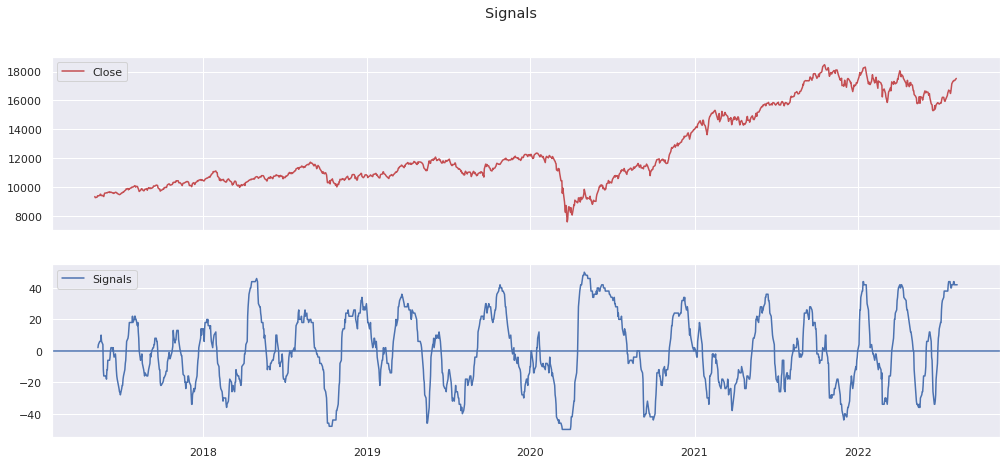

In [102]:
fig, ax = plt.subplots(2,1,figsize=(17,7),sharex=True)
ax[0].plot(nifty.loc[:, :].index, nifty.loc[:, 'Close'],'r', label='Close')
ax[1].plot(solution.loc[:, :].index, solution.loc[:, 'final'],'b', label='Signals')
#ax[1].plot(solution.iloc[:, :].index, solution.loc[:, 'avg_mov'], label='Moving_Average')
plt.suptitle('Signals')
ax[0].legend()
ax[1].legend()
ax[1].axhline(y=0)
plt.show()

In [103]:
new=pd.DataFrame()

In [104]:
new['signal_high'] = np.where((nifty['Close']>nifty['avg_mov']) & (solution['final']>solution['avg_mov_1']),1,0)

In [105]:
new['signal_low'] = np.where((nifty['Close']<nifty['avg_mov']) & (solution['final']<solution['avg_mov_1']),-1,0)

In [106]:
new['signal_final']=new['signal_high']+new['signal_low']

In [ ]:
#pd.concat([solution.reset_index(),new[-4:]],axis=0)

In [110]:
l=1400

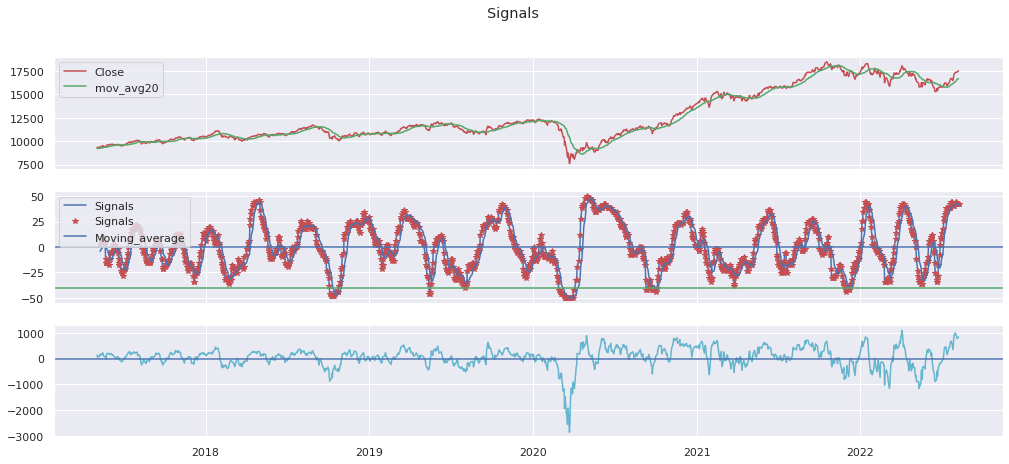

In [111]:
fig, ax = plt.subplots(3,1,figsize=(17,7),sharex=True)
ax[0].plot(nifty.loc[:, :].index[-l:], nifty.loc[:, 'Close'][-l:],'r', label='Close')
ax[0].plot(nifty.loc[:, :].index[-l:], nifty.loc[:, 'avg_mov'][-l:],'g', label='mov_avg20')
ax[1].plot(solution.loc[:, :].index[-l:], solution.loc[:, 'final'][-l:], label='Signals')
ax[1].plot(solution.loc[:, :].index[-l:], solution.loc[:, 'final'][-l:],'r*', label='Signals')
ax[1].plot(solution.iloc[:, :].index[-l:], solution.loc[:, 'avg_mov_1'][-l:],'b',label='Moving_average')
ax[2].plot(nifty.loc[:, :].index[-l:],nifty.loc[:,'spread'][-l:],'c',label='Spread')
#ax[3].plot(new.loc[:,:].index[-l:],new.loc[:,'signal_final'][-l:])
plt.suptitle('Signals')
ax[0].legend()
ax[1].legend(loc='upper left')
ax[1].axhline(y=0)
ax[2].axhline(y=0)
ax[1].axhline(y=-40,color='g')
plt.show()

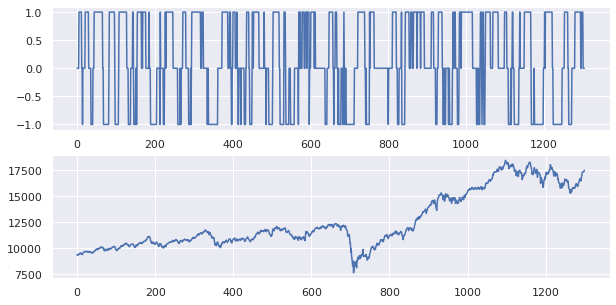

In [112]:
fig, ax = plt.subplots(2,1,figsize=(10,5),sharex=False)
ax[0].plot(new['signal_final'][-l:])
ax[1].plot(nifty['Close'][-l:].values)
plt.show()

In [ ]:
l=60
fig, ax = plt.subplots(3,1,figsize=(17,7),sharex=True)
ax[0].plot(nifty.loc[:, :].index[-l:], nifty.loc[:, 'Close'][-l:],'r', label='Close')
ax[0].plot(nifty.loc[:, :].index[-l:], nifty.loc[:, 'avg_mov'][-l:],'g', label='Close')
ax[1].plot(solution.loc[:, :].index[-l:], solution.loc[:, 'final'][-l:], label='Signals')
ax[1].plot(solution.loc[:, :].index[-l:], solution.loc[:, 'final'][-l:],'r*', label='Signals')
ax[1].plot(solution.iloc[:, :].index[-l:], solution.loc[:, 'avg_mov'][-l:],'b',label='Moving_average')
ax[2].plot(nifty.loc[:, :].index[-l:],nifty.loc[:,'spread'][-l:],'c',label='Spread')

plt.suptitle('Signals')
ax[0].legend()
ax[1].legend(loc='upper left')
ax[1].axhline(y=0)
ax[2].axhline(y=0)
ax[1].axhline(y=-40,color='g')
plt.show()

In [ ]:
solution['signals']=np.where(solution['final']>0,1,-1)

In [ ]:
if solution['signals'].iloc[-1]!=solution['signals'].iloc[-2]:
  var= solution['signals'].iloc[-1]
  print(f'signal changed to : {var}')
else :
  var= solution['signals'].iloc[-1]
  print(f'signal unchanged (1:stay long , -1: stay short) : {var}')

In [ ]:
# Calculate daily returns
nifty['Return'] = nifty.Close.pct_change()
 
# Calculate strategy returns
nifty['Strategy_F'] = nifty.Return * solution.signals.shift(1)

# Calculate geometric returns
geometric_returns = ((nifty.Strategy_F+1).cumprod()-1)
#np.sum(np.log(data/data.shift())*portfolio, axis=1)
# Plot geometric returns
geometric_returns.plot(figsize=(10, 7),color='g')
volatility = geometric_returns.std() * np.sqrt(252)
sharpe_ratio = (geometric_returns.mean() - 0.05) / volatility 
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()
print('sharpe ratio : ' ,sharpe_ratio)

std_neg = geometric_returns[geometric_returns<0].std()*np.sqrt(252)
sortino_ratio=(geometric_returns.mean() - 0.05)/std_neg
print('sortino ratio : ' , sortino_ratio)

In [ ]:
def max_drawdown(return_series):
    comp_ret =return_series
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()
geometric_returns=pd.DataFrame(geometric_returns)

max_drawdowns= geometric_returns.apply(max_drawdown)
print('max_drawdown : ' , max_drawdowns)

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(17,7),sharex=True)
ax[0].plot(nifty.loc[:, :].index, nifty.loc[:, 'Close'],'r', label='Close')
ax[1].plot(geometric_returns.index,geometric_returns,'g', label='returns')
#ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('Signals')
ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
nifty.tail(2)

In [ ]:
print('change in nifty from yesterday' ,(nifty.Close.iloc[-1]-nifty.Close.iloc[-2])/nifty.Close.iloc[-2]*100)